In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('mixed.csv')

In [3]:
df.head(5)

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers Company')

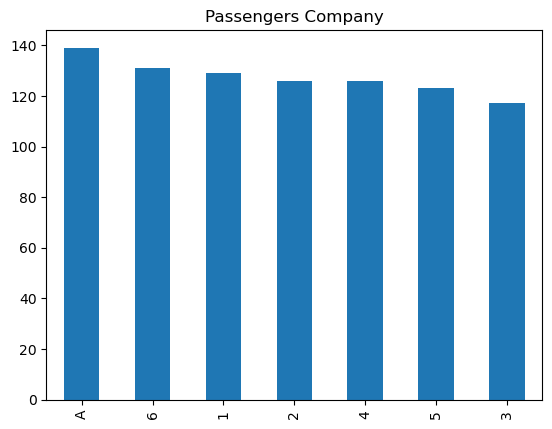

In [5]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers Company')

In [6]:
#extract the numerical part
df['num_numerical']= pd.to_numeric(df['number'],errors = 'coerce',downcast='integer')

# errors('igonre','raise','coerce'), default 'raise'
# if 'raise', then invalid parsing will raise an exception
# if 'coerce ' then invalid parsing will be set as a NAN
# if 'ignore' then invaild parsing will return the input 


In [7]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical
0,NaN,A/5 21171,5,0,5.0
1,C85,PC 17599,3,1,3.0
2,NaN,STON/O2. 3101282,6,1,6.0
3,C123,113803,3,1,3.0
4,NaN,373450,A,0,NaN


In [8]:
# Extract the categorical part
df['num_category'] = np.where(df['num_numerical'].isnull(),df['number'],np.nan)

In [9]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_category
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [10]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)')
df['cabin_cat']= df['Cabin'].str[0]

In [11]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_category,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<AxesSubplot:>

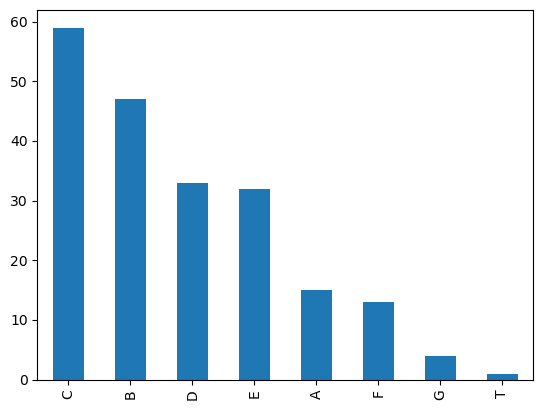

In [12]:
df['cabin_cat'].value_counts().plot(kind = 'bar')

In [13]:
df['Ticket'].sample(6)

444           65306
581           17421
791          239865
655    S.O.C. 14879
37       A./5. 2152
41            11668
Name: Ticket, dtype: object

In [14]:
df['Ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],errors = 'coerce',downcast='integer')

In [15]:
df['Ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])

In [16]:
df['Ticket_cat'] = np.where(df['Ticket_cat'].str.isdigit(),np.nan,df['Ticket_cat'])

In [17]:
df.head()

,Cabin,Ticket,number,Survived,num_numerical,num_category,cabin_num,cabin_cat,Ticket_num,Ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN


In [18]:
df['Ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

DATA AND TIME MINING

In [19]:
import pandas as pd
import numpy as np


In [20]:
date = pd.read_csv('orders.csv')
time = pd.read_csv('messages.csv')

In [21]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [22]:
date['date']=pd.to_datetime(date['date'])

In [23]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [24]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [25]:
date['date_year'] = date['date'].dt.year

In [26]:
date.head()

,date,product_id,city_id,orders,date_year
0,2019-12-10,5628,25,3,2019
1,2018-08-15,3646,14,157,2018
2,2018-10-23,1859,25,1,2018
3,2019-08-17,7292,25,1,2019
4,2019-01-06,4344,25,3,2019


In [27]:
date['date_month'] = date['date'].dt.month

In [28]:
date.head()

,date,product_id,city_id,orders,date_year,date_month
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [29]:
date['month_name'] = date['date'].dt.month_name()

In [30]:
date.head()

,date,product_id,city_id,orders,date_year,date_month,month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January


In [31]:
date['date_day'] = date['date'].dt.day

In [32]:
date.head()

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [33]:
date['date_dow'] = date['date'].dt.dayofweek

In [34]:
date.head(1)

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day,date_dow
0,2019-12-10,5628,25,3,2019,12,December,10,1


In [35]:
date['date_dow_name']=date['date'].dt.day_name()

In [36]:
date.head()

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day,date_dow,date_dow_name
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday
1,2018-08-15,3646,14,157,2018,8,August,15,2,Wednesday
2,2018-10-23,1859,25,1,2018,10,October,23,1,Tuesday
3,2019-08-17,7292,25,1,2019,8,August,17,5,Saturday
4,2019-01-06,4344,25,3,2019,1,January,6,6,Sunday


In [37]:
date.drop(columns=['product_id','city_id','orders']).head(1)

,date,date_year,date_month,month_name,date_day,date_dow,date_dow_name
0,2019-12-10,2019,12,December,10,1,Tuesday


In [38]:
date['is_weekend']=np.where(date['date_dow_name'].isin(['Sunday','Saturday']),1,0)

In [39]:
date.sample(5)

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day,date_dow,date_dow_name,is_weekend
280,2018-08-18,6716,16,2,2018,8,August,18,5,Saturday,1
357,2019-02-09,532,18,1,2019,2,February,9,5,Saturday,1
909,2018-10-10,3965,9,1,2018,10,October,10,2,Wednesday,0
173,2019-01-11,3543,23,1,2019,1,January,11,4,Friday,0
870,2019-08-10,3800,16,2,2019,8,August,10,5,Saturday,1


In [40]:
date['date_week'] = date['date'].dt.week

C:\Users\Asus\AppData\Local\Temp\ipykernel_4340\3869037006.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date['date_week'] = date['date'].dt.week


In [41]:
date.head(1)

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day,date_dow,date_dow_name,is_weekend,date_week
0,2019-12-10,5628,25,3,2019,12,December,10,1,Tuesday,0,50


In [42]:
date['quater'] = date['date'].dt.quarter

In [43]:
date.sample(1)

,date,product_id,city_id,orders,date_year,date_month,month_name,date_day,date_dow,date_dow_name,is_weekend,date_week,quater
275,2019-01-12,4850,26,3,2019,1,January,12,5,Saturday,1,2,1


In [44]:
br = 13 

In [45]:
print(type(br))

<class 'int'>


In [46]:
import datetime


In [47]:
today = datetime.datetime.today()

In [48]:
today

datetime.datetime(2023, 2, 10, 21, 22, 33, 717590)

In [49]:
(today-date['date']).dt.days

0      1158
1      1640
2      1571
3      1273
4      1496
       ... 
995    1586
996    1527
997    1375
998    1440
999    1214
Name: date, Length: 1000, dtype: int64

In [50]:
print('ThisIsPascalCase')

ThisIsPascalCase


In [51]:
print('thisIsCamelCase')

thisIsCamelCase


In [52]:
print('snake_case')

snake_case


In [53]:
class Atm1:
    #function vs methods(functions inside class)
    def __init__self():
        self.pin = ""
        self.balance = 0
        self.menu()
        
    def menu(self):
        user = input("""
        hello , how would you like to continue?
        1.Enter 1 create pin
        2.Enter 2 to deposit
        3.Enter 3 to Withdraw
        4.Enter 4 to Check Balance
        5.Enter 5 to Exit
        
""")
        if user == '1':
            print("Creat Pin")
            self.create_pin()
        elif user == '2':
            print('Deposit')
            self.Deposit()
        elif user == '3':
            print('Withdraw')
            self.Withdraw()
        elif user == '4':
            print('Check Balance')
            self.Check_Balance()
        else :
            print('EXIT')

In [54]:
class Atm:
    def __init__(self):
        
        self.pin = ''
        self.balance = 0
        self.menu()
    def menu(self):
        user = input("""
        Hello, how would you like to contiue ?
        1.Enter 1 create pin
        2.Enter 2 to Deposit
        3.Enter 3 to Withdraw
        4.Enter 4 to Check balance
        5.Enter 5 to exit
         """)
        if user =='1':
            #print("Create pin")
            self.create_pin()
        elif user == '2':
            #print("Deposit")
            self.Deposit()
        elif user == '3':
            #print("Withdraw")
            self.Withdraw()
        elif user == '4':
            #print("Check Balance")
            self.re_balance()
        else:
            print('EXIT')
            
    def create_pin(self):
        self.pin = input("Enter your pin")
        print("Pin Set Successfully")
        
    def Deposit(self):
        temp =input("Enter the pin") 
        if temp ==self.pin:
            amount = int(input("Enter the Amount"))
            self.balance = self.balance+amount
            print('Amount deposited Succesfully')
        else:
            print('Invaild pin')
            
    def Withdraw(self):
        temp = input('Enter the pin')
        if temp ==self.pin:
            amount = int(input("Enter the amount"))
            if amount< self.balance:
                self.balance = self.balance - amount
                print(' operation sucessfull')
            else:
                print('insufficientv fund')
        else:
            print('invalid pin')
            
    def re_balance(self):
        temp = int(input('Enter your pin'))
        if temp == self.pin:
            print(self.balance)
        else:
            print('ivalid pin')
            

In [55]:
sbi =Atm()


        Hello, how would you like to contiue ?
        1.Enter 1 create pin
        2.Enter 2 to Deposit
        3.Enter 3 to Withdraw
        4.Enter 4 to Check balance
        5.Enter 5 to exit
         1
Enter your pin2009
Pin Set Successfully


In [56]:
sbi.Deposit()

Enter the pin2009
Enter the Amount12000
Amount deposited Succesfully


In [57]:
sbi.Withdraw()

Enter the pin2009
Enter the amount2000
 operation sucessfull


In [58]:
sbi.re_balance()

Enter your pin2009
ivalid pin


In [59]:
#self:
class This_is_Baby:
    def __init__(self):
        print(id(self))
    def menu(self):
        pass

In [60]:
y = This_is_Baby()

1901134681616


In [61]:
id(y)

1901134681616

In [62]:
y1 = This_is_Baby

In [63]:
id(y1)

1901076696976

In [64]:
class Fraction :
    def __init__(self,n,d):
        self.num = n
        self.den = d
    def __str__(self):
        return "{}/{}".format(self.num,self.den)

In [65]:
s = Fraction(3,5)

In [66]:
print(s)

3/5


In [67]:
class Fraction:
    def __init__(self,n,d):
        self.num = n
        self.den = d 
    def __str__(self):
        return "{}/{}".format(self.num,self.den)
    
    def __add__(self,other):
        
        temp_num = self.num* other.den +other.num * self.den
        temp_den = self.den * other.den
        
        return "{}/{}".format(temp_num,temp_den)
    
    def __sub__(self,other):
        
        temp_num = self.num* other.den - other.num *self.den
        temp_den  = self.den * other.den
        
        return '{}/{}'.format(temp_num,temp_den)

    
    def __mul__(self,other):
        
        temp_num = self.num *other.num
        temp_den = self.den * other.den
        
        return '{}/{}'.format(temp_num,temp_den)
    
    def __truediv__(self,other):
        temp_num = self.num * other.den
        temp_den = self.num * other.den
        
        return '{}/{}'.format(temp_num,temp_den)

In [68]:
a = Fraction(3,6)

In [69]:
b = Fraction(1,5)

In [70]:
print(a+b)

21/30


In [71]:
print(a-b)
print(a+b)
print(a/b)
print(a*b)

9/30
21/30
15/15
3/30


In [72]:
class Atm:
    
    def __init__(self):
        
        self.__pin = ''
        self.__balance = 0
        self.menu()
        
    def get_pin(self):
        return self.__pin
    
    def set_pin(self,new_pin):
        self.__pin = new_pin
        print("pin changed")
        
    def menu(self):
        user = input("""
        hello, how would you like to continue?
        1.Enter 1 Create Pin
        2.Enter 2 to Deposit
        3.Enter 3 to withdraw
        4.Enter 4 to Check balance
        5 Enter 5 to EXIT
""")
        if user =='1':
            self.create_pin()
        elif user =='2': 
             self.deposit()
        elif user =='3':
            self.withdraw()
        elif user =='4':
             self.check_balnce()
        else :
            print("EXIT")
        
        
    def create_pin(self):
        self.__pin=input("Enter your pin ")
        print("pin set Sucessfully")
        
    def deposit(self):
        temp = input("enter your pin")
        if temp == self.__pin:
            amount =int(input("Enter the amount"))
            self.__balnce = self.__balance +amount
            print("deposit sucessfull")
        else:
            print("invalid pin")
            
    def withdraw(self):
        temp = input("enter the pin")
        if temp ==self.__pin:
            amount = int(input("Enter the amount"))
            if amount< self.__balance:
                self.__balance = self.__balance - amount
                print(' operation sucessfull')
            else:
                print('insufficient fund')
        else:
            print('invalid pin')
            
    def check_balance(self):
        temp = int(input('Enter your pin'))
        if temp == self.__pin:
            print(self.__balance)
        else:
            print('invalid pin')
            
        

In [73]:
s = Atm()



        hello, how would you like to continue?
        1.Enter 1 Create Pin
        2.Enter 2 to Deposit
        3.Enter 3 to withdraw
        4.Enter 4 to Check balance
        5 Enter 5 to EXIT
5
EXIT


In [74]:
s.get_pin()

''

In [75]:
s.set_pin(2343)

pin changed


In [76]:
class customer :
    def __init__(self,name,gender,address):
        self.name = name
        self.gender = gender 
        self.address = address
        
class address:
    def __init__(self,city,pincode,state):
        self.city = city
        self.pincode = pincode
        self.state = state

In [77]:
add = address("pune",411034,"Maha")


In [78]:
c = customer ("akash","male",add)

In [79]:
print(c.address.city)

pune


In [80]:
print(c.gender)

male


In [81]:
class customer :
    def __init__(self,name,gender,address):
        self.name = name
        self.gender = gender 
        self.address = address
    
    def edit_profile(self,new_name,new_city,new_pincode,new_state):
        self.name = new_name
        self.address.change_address(new_name,new_city,new_pincode,new_state)
        
class address:
    def __init__(self,city,pincode,state):
        self.city = city
        self.pincode = pincode
        self.state = state
        
    def change_address(self,new_name,new_vity,new_pincode,new_state):
        self.name = new_name
        self.city = new_city
        self.pincode = new_pincode
        self.state = new_state